In [160]:
import os
import glob
import pyart
import mcmaps
import numpy as np
import radarx as rx
import xradar as xd
import xarray as xr
import matplotlib.pyplot as plt

In [161]:
dtree = xd.io.open_cfradial1_datatree(
    "/Users/syed44/Downloads/MULTIDOPPLER/CFRAD/KGWX/KGWX20220331_003330_V06_retr.nc")

In [162]:
dtree = dtree.xradar.georeference()

In [163]:
def range_rings(ax, rings=None, **kwargs):
    """
    Plot concentric range rings on a radar plot.

    Parameters
    ----------
    rings : list or None
        A list of radii in kilometers for which range rings should be plotted.
        Defaults to [100, 200, 300, 400] if not specified.

    **kwargs : dict
        Additional keyword arguments passed to `ax.plot()`, e.g., color, linestyle, linewidth, alpha.
    """
    theta = np.linspace(0, 2 * np.pi, 360)

    if rings is None:
        rings = [100 * i for i in range(1, 5)]  # default: [100, 200, 300, 400] km

    for r in rings:
        r_meters = r * 1e3
        x = r_meters * np.cos(theta)
        y = r_meters * np.sin(theta)
        ax.plot(x, y, **kwargs)

In [164]:
def azimuth_lines(ax, azimuths=None, max_range_km=500, **kwargs):
    """
    Plot radial azimuth lines on a radar plot.

    Parameters
    ----------
    ax : matplotlib.axes.Axes
        The axes on which to plot the azimuth lines.

    azimuths : list or None
        List of azimuth angles in degrees where radial lines should be drawn.
        Defaults to every 30 degrees if not specified.

    max_range_km : float
        Maximum range (in kilometers) for extending the azimuth lines.

    **kwargs : dict
        Additional keyword arguments passed to `ax.plot()`, e.g., color, linestyle, linewidth, alpha.
    """
    if azimuths is None:
        azimuths = np.arange(0, 360, 30)  # default: every 30 degrees

    r_meters = max_range_km * 1e3
    for az in azimuths:
        theta_rad = np.deg2rad(az)
        x = [0, r_meters * np.cos(theta_rad)]
        y = [0, r_meters * np.sin(theta_rad)]
        ax.plot(x, y, **kwargs)

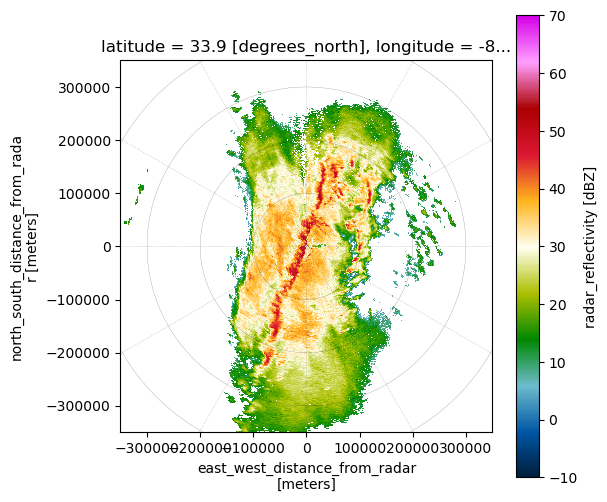

In [165]:
fig = plt.figure(figsize=(6, 6))
ax = plt.axes()
lim = 350e3

dtree['sweep_0']['REF'].plot(
    x='x', y='y',
    cmap='SyedSpectral',
    vmin=-10, vmax=70,
    xlim=(-lim, lim), ylim=(-lim, lim),
    ax=ax
)

range_rings(ax=ax, color="k", linestyle="-", lw=0.1)
azimuth_lines(ax=ax, color="gray", linestyle=":", lw=0.5, alpha=0.6)
ax.set_aspect('equal')

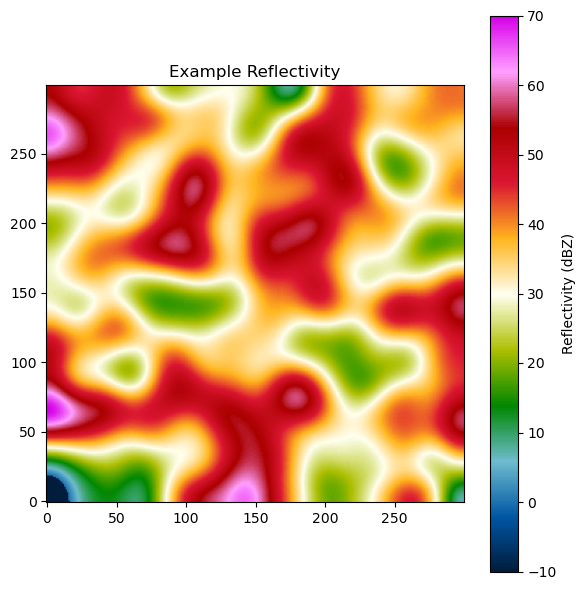

In [167]:
import numpy as np
import matplotlib.pyplot as plt
from scipy.ndimage import gaussian_filter

# Grid setup
shape = (300, 300)
background_dbz = -10.0
reflectivity = np.full(shape, background_dbz)

# Create random noise and blur it to look like a cloud
np.random.seed(42)  # For reproducibility
noise = np.random.rand(*shape)
cloud = gaussian_filter(noise, sigma=15)

# Normalize and scale to dBZ range
cloud_normalized = (cloud - cloud.min()) / (cloud.max() - cloud.min())
cloud_dbz = cloud_normalized * 80 - 10  # scale to -10 to 70 dBZ

# Threshold to isolate cloud shape
cloud_mask = cloud_dbz > 0  # only keep significant reflectivity
reflectivity[cloud_mask] = cloud_dbz[cloud_mask]

plt.figure(figsize=(6, 6))
plt.title("Example Reflectivity")
plt.imshow(reflectivity, cmap='SyedSpectral', origin='lower', vmin=-10, vmax=70)
plt.colorbar(label='Reflectivity (dBZ)')
# plt.axis('off')
plt.tight_layout()
plt.show()

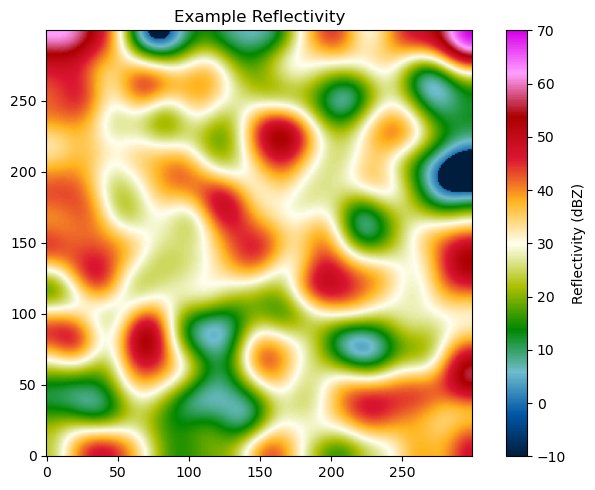

In [170]:
"""
Example: Using SyedSpectral Colormap on Simulated Radar Reflectivity

This script demonstrates how to use the `SyedSpectral` colormap included in `mcmaps`
to visualize synthetic radar reflectivity data.
"""
import mcmaps # noqa
import numpy as np
import matplotlib.pyplot as plt
from scipy.ndimage import gaussian_filter

# Create synthetic reflectivity field (looks like a cloud)
shape = (300, 300)
reflectivity = np.full(shape, -10.0)  # background dBZ

np.random.seed(101)
noise = np.random.rand(*shape)
cloud = gaussian_filter(noise, sigma=15)

# Normalize and scale
cloud_normalized = (cloud - cloud.min()) / (cloud.max() - cloud.min())
cloud_dbz = cloud_normalized * 80 - 10  # -10 to 70 dBZ
cloud_mask = cloud_dbz > 0
reflectivity[cloud_mask] = cloud_dbz[cloud_mask]

# Plot using custom colormap
plt.figure(figsize=(7, 5))
plt.title("Example Reflectivity")
plt.imshow(reflectivity, cmap='SyedSpectral', vmin=-10, vmax=70, origin='lower')
plt.colorbar(label='Reflectivity (dBZ)')
plt.tight_layout()
plt.show()

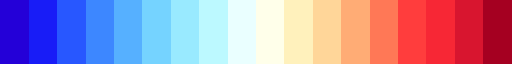

In [171]:
mcmaps.cm.BlueDarkRed18

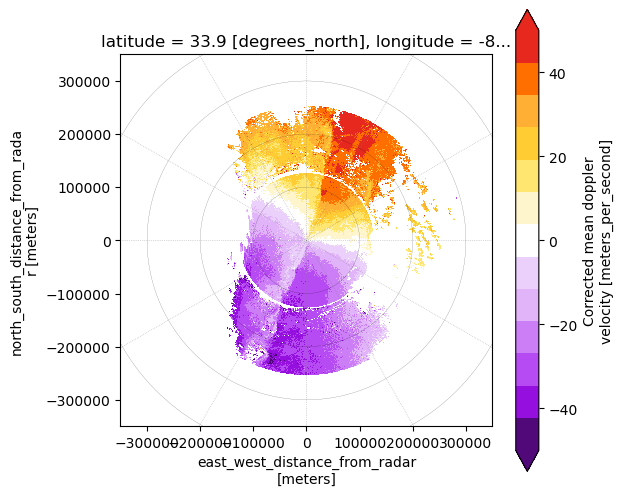

In [27]:
fig = plt.figure(figsize=(6, 6))
ax = plt.axes()
lim = 350e3

dtree['sweep_0']['VEL'].plot(
    x='x', y='y',
    cmap='SunShine12',
    vmin=-50, vmax=50,
    xlim=(-lim, lim), ylim=(-lim, lim),
    ax=ax
)

range_rings(ax=ax, color="k", linestyle="-", lw=0.1)
azimuth_lines(ax=ax, color="gray", linestyle=":", lw=0.5, alpha=0.6)
ax.set_aspect('equal')

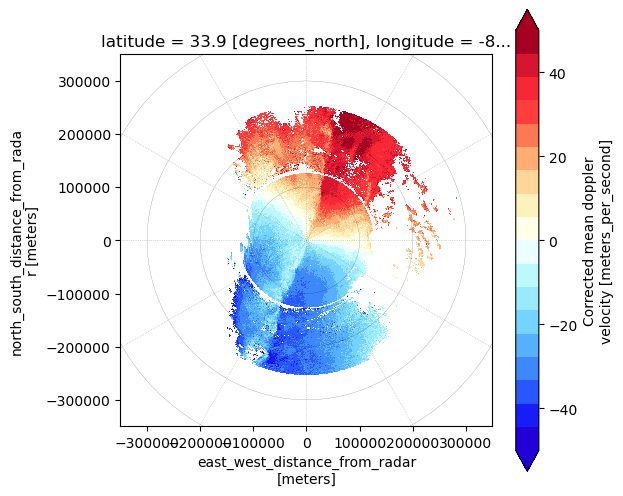

In [28]:
fig = plt.figure(figsize=(6, 6))
ax = plt.axes()
lim = 350e3

dtree['sweep_0']['VEL'].plot(
    x='x', y='y',
    cmap='BlueDarkRed18',
    vmin=-50, vmax=50,
    xlim=(-lim, lim), ylim=(-lim, lim),
    ax=ax
)

range_rings(ax=ax, color="k", linestyle="-", lw=0.1)
azimuth_lines(ax=ax, color="gray", linestyle=":", lw=0.5, alpha=0.6)
ax.set_aspect('equal')

In [ ]:
import numpy as np
import matplotlib.pyplot as plt
from matplotlib.colors import LinearSegmentedColormap
import ipywidgets as widgets
from IPython.display import display, clear_output
import matplotlib.colors as mcolors  # Add this at the top

# Initialize dynamic number of stops
max_colors = 12

# Container to hold the UI widgets
controls_output = widgets.Output()
preview_output = widgets.Output()

# State
color_stops = []
position_sliders = []
color_pickers = []

# Callback for updating
def update_preview(*args):
    with preview_output:
        clear_output(wait=True)
        positions = [slider.value for slider in position_sliders]
        colors = [picker.value for picker in color_pickers]

        # Ensure sorted positions
        sorted_data = sorted(zip(positions, colors), key=lambda x: x[0])
        positions, colors = zip(*sorted_data)
        cmap = LinearSegmentedColormap.from_list("Custom", list(zip(positions, colors)))

        # Show the gradient
        gradient = np.linspace(0, 1, 256).reshape(1, -1)
        plt.figure(figsize=(6, 1))
        plt.imshow(gradient, aspect='auto', cmap=cmap)
        plt.axis('off')
        plt.title("Live Colormap Preview")
        plt.show()

# Dynamic creator
def create_controls(num_colors):
    global color_stops, position_sliders, color_pickers
    color_stops = np.linspace(0, 1, num_colors)
    default_colors = plt.cm.jet(np.linspace(0, 1, num_colors))

    # Clear previous
    for w in (controls_output, preview_output):
        w.clear_output()

    # Create new sliders and pickers
    position_sliders = []
    color_pickers = []

    with controls_output:
        for i in range(num_colors):
            pos_slider = widgets.FloatSlider(
                value=float(color_stops[i]),
                min=0.0, max=1.0, step=0.01,
                description=f'Pos {i}',
                continuous_update=True
            )
            color_picker = widgets.ColorPicker(
                value=mcolors.to_hex(default_colors[i]),
                description=f'Color {i}',
                style={'description_width': 'initial'}
            )
            position_sliders.append(pos_slider)
            color_pickers.append(color_picker)

            pos_slider.observe(update_preview, names='value')
            color_picker.observe(update_preview, names='value')

            display(widgets.HBox([pos_slider, color_picker]))

    update_preview()

In [33]:
import os

# Export button callback
def export_colormap(_):
    positions = [slider.value for slider in position_sliders]
    colors = [picker.value for picker in color_pickers]
    
    # Sort by position
    sorted_data = sorted(zip(positions, colors), key=lambda x: x[0])
    positions, colors = zip(*sorted_data)
    
    cmap = LinearSegmentedColormap.from_list("Custom", list(zip(positions, colors)))
    
    # Save to .npy
    np.save("custom_colormap.npy", np.array([positions, colors], dtype=object))
    
    # Optional: Show a string version of a Python function
    colormap_func_str = f"""from matplotlib.colors import LinearSegmentedColormap

def get_custom_colormap():
    stops = {list(positions)}
    colors = {list(colors)}
    return LinearSegmentedColormap.from_list("Custom", list(zip(stops, colors)))
"""
    with open("custom_colormap.py", "w") as f:
        f.write(colormap_func_str)

    with preview_output:
        print("✅ Colormap exported:")
        print("- custom_colormap.npy")
        print("- custom_colormap.py")

In [37]:
# Dropdown for choosing number of stops
k_slider = widgets.IntSlider(
    value=3, min=2, max=max_colors, step=1, description="Number of Colors"
)

k_slider.observe(lambda change: create_controls(change.new), names='value')

# Display everything
display(k_slider)
display(controls_output)
display(preview_output)

# Initial setup
create_controls(k_slider.value)

# Export button
export_btn = widgets.Button(description="💾 Export Colormap", button_style='success')
export_btn.on_click(export_colormap)
display(export_btn)

IntSlider(value=3, description='Number of Colors', max=12, min=2)

Output(outputs=({'output_type': 'display_data', 'data': {'text/plain': "HBox(children=(FloatSlider(value=0.0, …

Output(outputs=({'output_type': 'display_data', 'data': {'text/plain': '<Figure size 600x100 with 1 Axes>', 'i…

Button(button_style='success', description='💾 Export Colormap', style=ButtonStyle())

In [38]:
import numpy as np
from matplotlib.colors import LinearSegmentedColormap

positions, colors = np.load("custom_colormap.npy", allow_pickle=True)
cmap = LinearSegmentedColormap.from_list("Custom", list(zip(positions, colors)))

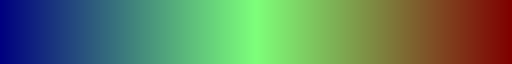

In [39]:
cmap

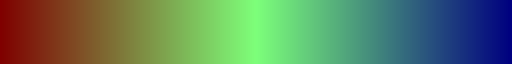

In [45]:
cmap.

In [56]:
def export_colormap_rgb(_, name="SunShine12"):
    positions = [slider.value for slider in position_sliders]
    colors = [picker.value for picker in color_pickers]

    # Sort colors by position
    sorted_data = sorted(zip(positions, colors), key=lambda x: x[0])
    positions, hex_colors = zip(*sorted_data)

    # Convert hex to RGB
    def hex_to_rgb(hex_color):
        hex_color = hex_color.lstrip("#")
        return tuple(int(hex_color[i:i+2], 16) for i in (0, 2, 4))

    rgb_colors = [hex_to_rgb(hc) for hc in hex_colors]

    # Write to file
    filename = f"{name}.txt"
    with open(filename, "w") as f:
        f.write(f"This is {name}\n")
        f.write("# Copyright: Hamid\n")
        f.write("# R,G,B\n")
        for r, g, b in rgb_colors:
            f.write(f"{r},{g},{b}\n")

    with preview_output:
        print(f"🎨 Colormap '{name}' exported to '{filename}' with {len(rgb_colors)} stops.")

In [58]:
# Name input

# Dropdown for choosing number of stops
k_slider = widgets.IntSlider(
    value=3, min=2, max=max_colors, step=1, description="Number of Colors"
)

k_slider.observe(lambda change: create_controls(change.new), names='value')

# Display everything
display(k_slider)
display(controls_output)
display(preview_output)

# Initial setup
create_controls(k_slider.value)

colormap_name = widgets.Text(value='GrRd', description='Colormap Name:')

# Button for RGB export
export_rgb_btn = widgets.Button(description="⬇️ Export as RGB File", button_style='info')

# Callback connects with colormap name
export_rgb_btn.on_click(lambda x: export_colormap_rgb(x, colormap_name.value))

# Display
display(colormap_name, export_rgb_btn)

IntSlider(value=3, description='Number of Colors', max=12, min=2)

Output(outputs=({'output_type': 'display_data', 'data': {'text/plain': "HBox(children=(FloatSlider(value=0.0, …

Output(outputs=({'output_type': 'display_data', 'data': {'text/plain': '<Figure size 600x100 with 1 Axes>', 'i…

Text(value='GrRd', description='Colormap Name:')

Button(button_style='info', description='⬇️ Export as RGB File', style=ButtonStyle())

In [59]:
!cat GrRd.txt

This is GrRd
# Copyright: Hamid
# R,G,B
208,219,123
255,255,255
210,96,157


In [129]:
import pandas as pd

In [130]:
# Read while skipping comment/header lines
df = pd.read_csv(
    "GrM.txt",
    comment='#',         # skips lines starting with '#'
    skiprows=2,          # skip "This is GrRd" and copyright line
    names=["R", "G", "B"]  # manually set column names
)

df

,R,G,B
0,41,142,53
1,255,255,255
2,255,10,235


In [131]:
import matplotlib as mpl

In [153]:
def linearize(df, name='Blnc'):
    rgb = df.to_numpy() / 255.0

    # Create LinearSegmentedColormap with interpolated gradient
    positions = np.linspace(0, 1, len(rgb))  # evenly spaced
    color_list = list(zip(positions, rgb))
    cmap = mcolors.LinearSegmentedColormap.from_list(name, color_list)
    mpl.colormaps.register(cmap, name=name)
    mpl.colormaps.register(cmap.reversed(), name=f"{name}_r")
    return cmap

In [152]:
cmm = linearize(df)

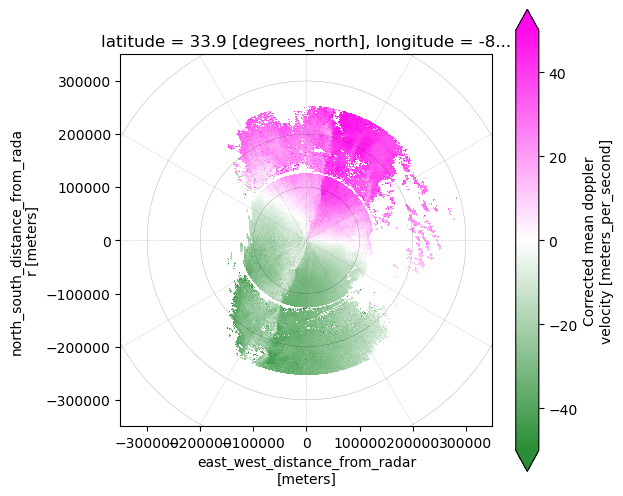

In [155]:
fig = plt.figure(figsize=(6, 6))
ax = plt.axes()
lim = 350e3

dtree['sweep_0']['VEL'].plot(
    x='x', y='y',
    cmap='Blnc',
    vmin=-50, vmax=50,
    xlim=(-lim, lim), ylim=(-lim, lim),
    ax=ax
)

range_rings(ax=ax, color="k", linestyle="-", lw=0.1)
azimuth_lines(ax=ax, color="gray", linestyle=":", lw=0.5, alpha=0.6)
ax.set_aspect('equal')